In [ ]:
from tqdm import tqdm
import polars as pl
from transformers import pipeline

C:\Users\I569776\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import polars as pl

df = pl.read_parquet('hf://datasets/community-datasets/senti_ws/sentiment-scoring/train-00000-of-00001.parquet')
df

word,sentiment-score
str,f32
"""Abmachung""",0.004
"""Abschluß""",0.004
"""Abstimmung""",0.004
"""Agilität""",0.004
"""Aktivität""",0.004
…,…
"""übersehen""",-0.5128
"""übertreiben""",-0.0372
"""übertreten""",-0.329


In [5]:
df = pl.read_parquet("../../../../bundestags_daten.parquet")
#list(df["speechContent"])
df.sample(10)

firstName,lastName,speechContent,date,abbreviation,full_name
str,str,str,str,str,str
null,"""Czaja""","""Meine zweite Zusatzfrage bezie…","""1981-10-08""","""CDU/CSU""","""Christlich Demokratische Union…"
"""Gila""","""Altmann""","""Herr Carstens, ich habe eine F…","""1996-10-17""","""Grüne""","""Bündnis 90/Die Grünen"""
null,"""ertl""","""Wären Sie dann aber so freundl…","""1967-04-13""","""FDP""","""Freie Demokratische Partei"""
null,"""Wolf""","""Herr Kollege Schmidt, geben Si…","""1967-12-13""","""SPD""","""Sozialdemokratische Partei Deu…"
"""Spies""","""Büllesheim""","""Herr Staatsminister, dann ist …","""1978-06-22""","""CDU/CSU""","""Christlich Demokratische Union…"
"""Liesel""","""Hartenstein""","""Frau Präsidentin! Liebe Kolleg…","""1994-09-21""","""SPD""","""Sozialdemokratische Partei Deu…"
"""paul""","""krüger""","""Frau Präsidentin! Meine sehr v…","""1994-11-24""","""CDU/CSU""","""Christlich Demokratische Union…"
"""Evelin""","""Fischer""","""- daß er sich mit einem Herrn …","""1994-09-06""","""SPD""","""Sozialdemokratische Partei Deu…"
"""Oliver""","""Krischer""","""Herr Staatssekretär, ich kann …","""2015-09-30""","""Grüne""","""Bündnis 90/Die Grünen"""


In [ ]:
import polars as pl
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# Load SentiWS from Hugging Face parquet
df_lexicon = pl.read_parquet('hf://datasets/community-datasets/senti_ws/sentiment-scoring/train-00000-of-00001.parquet')

# Convert to dictionary for faster lookups (using 'sentiment-score')
lexicon = dict(zip(df_lexicon["word"].to_list(), df_lexicon["sentiment-score"].to_list()))

# Load your dataset
df = pl.read_parquet("../../../../bundestags_daten.parquet")

def analyze_sentiment_sentiws(text, lexicon):
    if text is None or not isinstance(text, str):
        return {'compound': None, "pos": None, "neg": None}  # Return None for compound if text is missing
    
    tokens = word_tokenize(text.lower())
    compound_score = 0
    pos_score = 0
    neg_score = 0

    for token in tokens:
        if token in lexicon:
            if lexicon[token] > 0:
                pos_score += lexicon[token]
            if lexicon[token] < 0:
                neg_score -= lexicon[token]
            compound_score += lexicon[token] # Add the sentiment score directly

    return {'compound': compound_score, 'pos': pos_score, 'neg': neg_score}  # Return a dictionary with 'compound' score


# Use tqdm directly with a list comprehension:
tqdm.pandas(desc="Calculating Sentiments") # Initialize tqdm for the progress bar
sentiments = [analyze_sentiment_sentiws(text, lexicon) for text in tqdm(df["speechContent"]) ] # iterate with progress bar


100%|██████████| 374076/374076 [09:10<00:00, 679.60it/s] 


In [31]:
sentiments[0]

{'compound': 0, 'pos': 0, 'neg': 0}

In [37]:
for s in sentiments:
    if s["pos"] == None:
        s = {"pos":0.0, "compound":0.0,"neg":0.0}

In [39]:
col1 = pl.Series("pos", [a["pos"] for a in sentiments], dtype=pl.Float64)
col2 = pl.Series("neg", [a["neg"] for a in sentiments], dtype=pl.Float64)
col3 = pl.Series("com", [a["compound"] for a in sentiments], dtype=pl.Float64)

df_sentiment = pl.DataFrame([col1, col2, col3])


df_sentiment

pos,neg,com
f64,f64,f64
0.0,0.0,0.0
0.008,0.4691,-0.4611
1.1012,1.1548,-0.0536
0.004,0.0,0.004
0.4857,0.0048,0.4809
…,…,…
1.1082,1.6392,-0.531
0.2284,0.0,0.2284
0.0,0.0,0.0


In [41]:
df = pl.concat([df,df_sentiment], how='horizontal')

In [42]:
df.write_parquet("./sentiment.parquet")

In [ ]:
df = pl.read_parquet("./sentiment.parquet")

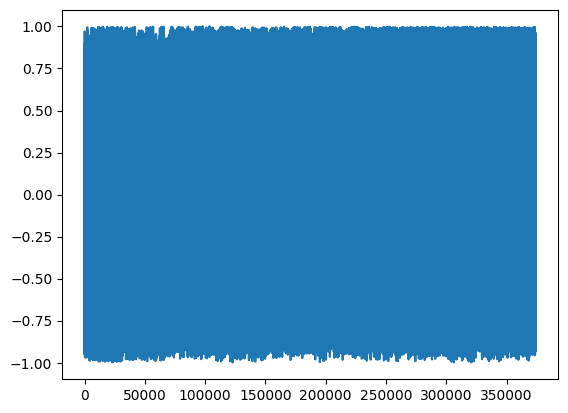

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime

some_list = [datetime.strptime(a, "%Y-%m-%d") for a in df["date"]]


plt.plot(range(0,len(df)),list(df["comp"]), 0.8)
plt.show()

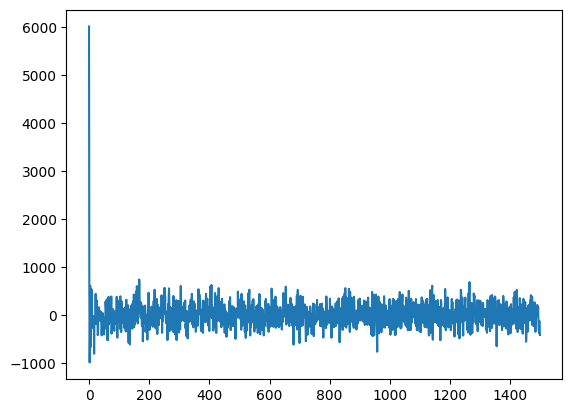

In [23]:
from scipy.fft import fft

ff = fft(list(df["comp"]))
plt.plot(ff[0:1500])

In [1]:
df

NameError: name 'df' is not defined

In [63]:
sentiment_by_party = df.group_by("abbreviation").agg(pl.col("pos").mean() , pl.col("neg").mean(), pl.col("com").mean())
sentiment_by_party

abbreviation,pos,neg,com
str,f64,f64,f64
"""Gast""",0.157658,0.238883,-0.081225
"""SPD""",0.703165,0.629243,0.073922
"""FDP""",0.776601,0.724976,0.051625
"""AfD""",0.627579,0.900186,-0.272607
"""Grüne""",0.664847,0.742584,-0.077737
…,…,…,…
"""DIE LINKE.""",0.657993,0.908751,-0.250758
"""GB/BHE""",1.222975,1.107847,0.115128
"""FVP""",0.738678,0.608088,0.130591


C:\Users\I569776\AppData\Local\Temp\ipykernel_2472\3192366700.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sentiment_by_party["abbreviation"], rotation=90)


AttributeError: module 'matplotlib.pyplot' has no attribute 'shoe'

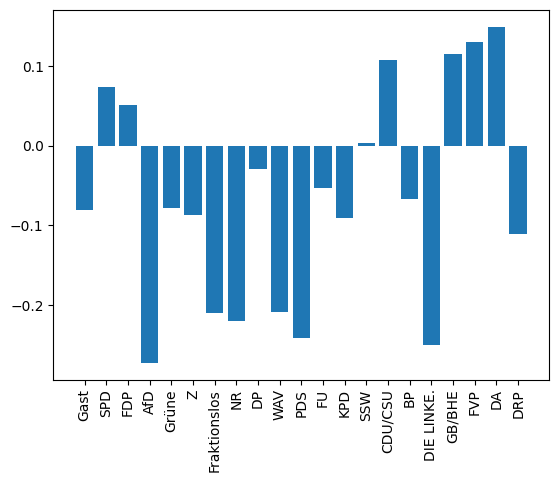

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(sentiment_by_party["abbreviation"], sentiment_by_party["com"])

ax.set_xticklabels(sentiment_by_party["abbreviation"], rotation=90)
plt.shoe()

# Sentiment by party and time using dictionary

In [109]:
sentiment_by_party_and_time = df.group_by("abbreviation").agg(pl.col("pos"), pl.col("neg"), pl.col("com"), pl.col("date"))
sentiment_by_party_and_time = sentiment_by_party_and_time.filter(pl.col("abbreviation").is_in(["Grüne", "CDU/CSU", "SPD", "FDP", "AfD", "DIE LINKE."]))

sentiment_by_party_and_time

abbreviation,pos,neg,com,date
str,list[f64],list[f64],list[f64],list[str]
"""CDU/CSU""","[0.0, 4.4763, … 0.8852]","[0.0, 4.5157, … 0.5446]","[0.0, -0.0394, … 0.3406]","[""1949-09-15"", ""1949-09-21"", … ""2021-05-07""]"
"""DIE LINKE.""","[0.0, 1.2346, … 0.012]","[0.0, 2.644, … 0.0]","[0.0, -1.4094, … 0.012]","[""2006-06-22"", ""2005-11-08"", … ""2021-05-07""]"
"""FDP""","[0.008, 4.72, … 0.1634]","[0.4691, 5.4011, … 0.0]","[-0.4611, -0.6811, … 0.1634]","[""1949-09-15"", ""1949-09-21"", … ""2021-05-07""]"
"""SPD""","[1.1012, 2.6406, … 0.5909]","[1.1548, 4.1781, … 1.4635]","[-0.0536, -1.5375, … -0.8726]","[""1949-09-15"", ""1949-09-21"", … ""2021-05-07""]"
"""Grüne""","[0.6391, 0.1409, … 0.0]","[0.0651, 2.0317, … 0.0]","[0.574, -1.8908, … 0.0]","[""1983-05-04"", ""1983-05-19"", … ""2021-05-07""]"
"""AfD""","[1.126, 0.1209, … 0.4489]","[0.5648, 0.0048, … 3.2544]","[0.5612, 0.1161, … -2.8055]","[""2017-10-24"", ""2017-11-21"", … ""2021-05-07""]"


In [110]:
# Assuming 'sentiment_by_party_and_time' is your DataFrame
# Explode the lists
df_exploded = sentiment_by_party_and_time.explode(["pos", "neg", "com", "date"])

# Extract the year from the date
df_with_year = df_exploded.with_columns([
    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d").dt.year().alias("year")
])

# Group by year and party, then calculate the mean compound sentiment
aggregated_df = df_with_year.group_by(["abbreviation", "year"]).agg([
    pl.col("com").mean().alias("mean_com")
])

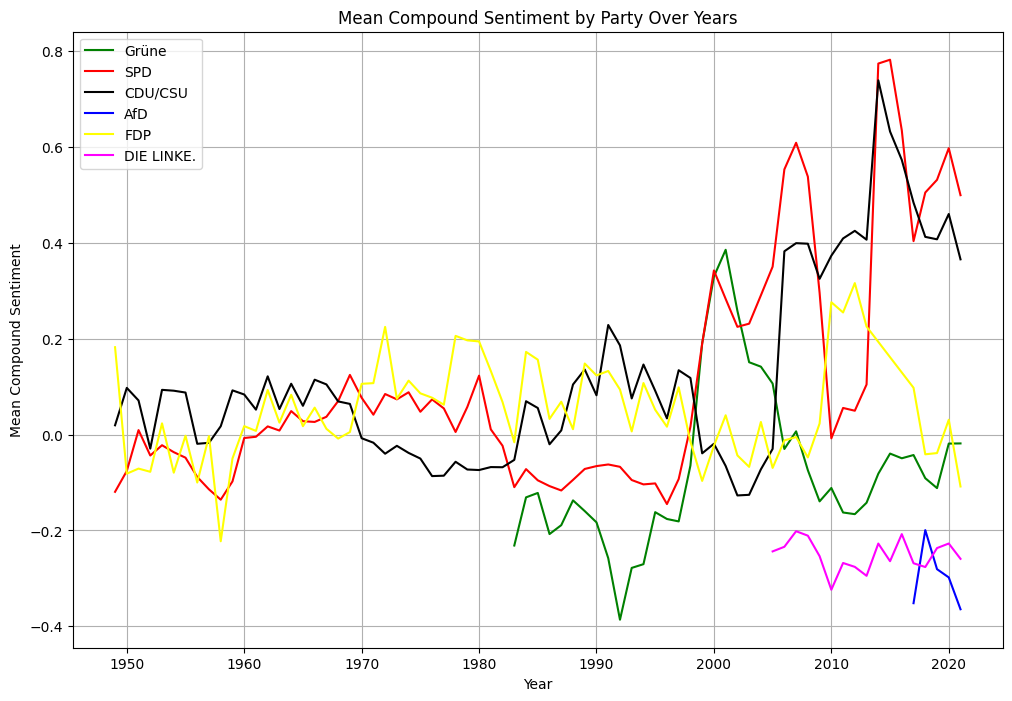

In [111]:
import pandas as pd

aggregated_df_pandas = pd.DataFrame(aggregated_df.to_dicts())

# Sort data for each party by year
parties = aggregated_df_pandas["abbreviation"].unique()
party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'Grüne': 'green',
    'FDP': 'yellow',
    'AfD': 'blue',
    'DIE LINKE.': 'magenta',
    'Fraktionslos': 'gray'
}

plt.figure(figsize=(12, 8))

for i, party in enumerate(parties):
    party_data = aggregated_df_pandas[aggregated_df_pandas["abbreviation"] == party]
    
    # Sort party data by year
    party_data_sorted = party_data.sort_values(by="year")
    
    years = party_data_sorted["year"]
    compound_sentiment = party_data_sorted["mean_com"]
    plt.plot(years, compound_sentiment, linestyle='-', color=party_colors.get(party, 'black'), label=party)

plt.xlabel('Year')
plt.ylabel('Mean Compound Sentiment')
plt.title('Mean Compound Sentiment by Party Over Years')
plt.legend()
plt.grid(True)
plt.show()